In [4]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '..')
from mdps.nroom_mdp import create_room_hierarchical
import numpy as np
import random
from LMDPs.plotting import plot_as_matrix as plotmat
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
def get_rewards(state_idx):
    
    r = np.full((5,1), -1)
    
    if state_idx == 25:
        r[0] = 0
    elif state_idx == 26:
        r[1] = 0
    elif state_idx == 27:
        r[2] = 0
    elif state_idx == 28:
        r[3] = 0
    elif state_idx == 29:
        r[4] = 0

    return r

In [6]:
def get_importance_weights(P, Z_i, state_idx, next_state_idx):
        if state_idx>24:
            return P[state_idx, next_state_idx]
        else:
            values = P[state_idx, next_state_idx] * Z_i[:, next_state_idx]
            sums = np.einsum('j,ij->i', P[state_idx, :], Z_i)
                        
            res = (values / sums).reshape(-1, 1)

            return P[state_idx, next_state_idx] / res

In [13]:
r_dim = 5

goal_pos = (2,3)


P, states, R = create_room_hierarchical(r_dim, goal_pos)

non_terminal = states[-5:]


In [15]:
Z = np.ones((5, 30))

P = np.asarray(P)

for t in range(900):
    
    state = random.choice(range(25))
    
    terminate = False
    
    alfa = 500 / (500 + t + 1)
    
    while not terminate:
        r = get_rewards(state)
        idxs = np.where(~np.isnan(P[state]))[0]
        next_state = np.random.choice(idxs, p=P[state, idxs])
        
        w_i_a = get_importance_weights(P, Z, state, next_state)
        
        Z[:, state] = (1 - alfa) * Z[:, state] + alfa * np.exp(r).T * Z[:, next_state]
                
        terminate = state > 24
        state = next_state
        

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
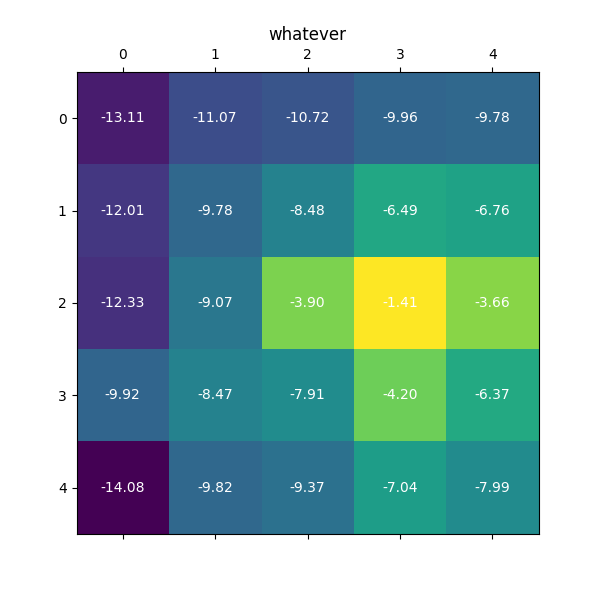

In [17]:
plotmat(np.log(Z[4, :25]).reshape(5,5), 'whatever', annotated=True, figsize=(6,6))
plt.show()

In [24]:
np.round(np.log(Z[3, :25]).reshape(5,5), 4)

array([[-14.1285, -10.9387, -14.701 , -14.4198, -15.2156],
       [-10.8477,  -8.7778,  -8.6819, -12.2842, -13.2685],
       [ -9.4345,  -7.9396,  -5.4333, -12.6426, -12.2589],
       [ -7.712 ,  -7.1025,  -2.9863,  -9.8853,  -9.8724],
       [ -7.0361,  -3.7007,  -1.2708,  -3.4767,  -7.6123]])